### Synchronization

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Set up parameters and fix an initial condition
max_iter = 500
t = np.arange(max_iter)
N = 30
dt = 0.01
phi0 = 2 * np.pi * np.random.rand(N)

W = 5 * np.random.rand(N,1) # Natural freqs
K = 5 # Coupling
A = np.zeros((N,N))
L = np.zeros((N,N))
deg = np.sum(A,axis=0)
eigSort = sorted(np.linalg.eig(L)[0])
while np.abs( eigSort[1] ) < 1e-5:
    ni = np.random.randint(N)
    nj = np.random.randint(N)
    if (ni != nj) and (A[ni,nj] == 0):
        A[ni,nj] = 1
        A[nj,ni] = 1
        deg[ni] += 1
        deg[nj] += 1
        L = np.diag(deg) - A
        eigSort = sorted(np.linalg.eig(L)[0])

In [24]:
eigSort

[1.3549046906481839e-15,
 0.5908136291450209,
 0.7478391847572303,
 0.8516937018844059,
 0.9879013674444934,
 1.2929041542624515,
 1.4403649655769963,
 1.624132813624489,
 1.7559681209534121,
 1.9172872118034836,
 2.2420752935913972,
 2.3915011513274838,
 2.5229860505457378,
 2.8237625134268365,
 3.379482807311294,
 3.681586446216588,
 4.102909933098304,
 4.389243805286254,
 4.413281409636676,
 4.96220251930113,
 5.223892066557335,
 5.791371426114677,
 6.118079178558268,
 6.3728823572455795,
 6.754117186386197,
 7.222881498303404,
 7.696864466145519,
 8.467186006449058,
 8.85625666101198,
 9.37853207403425]

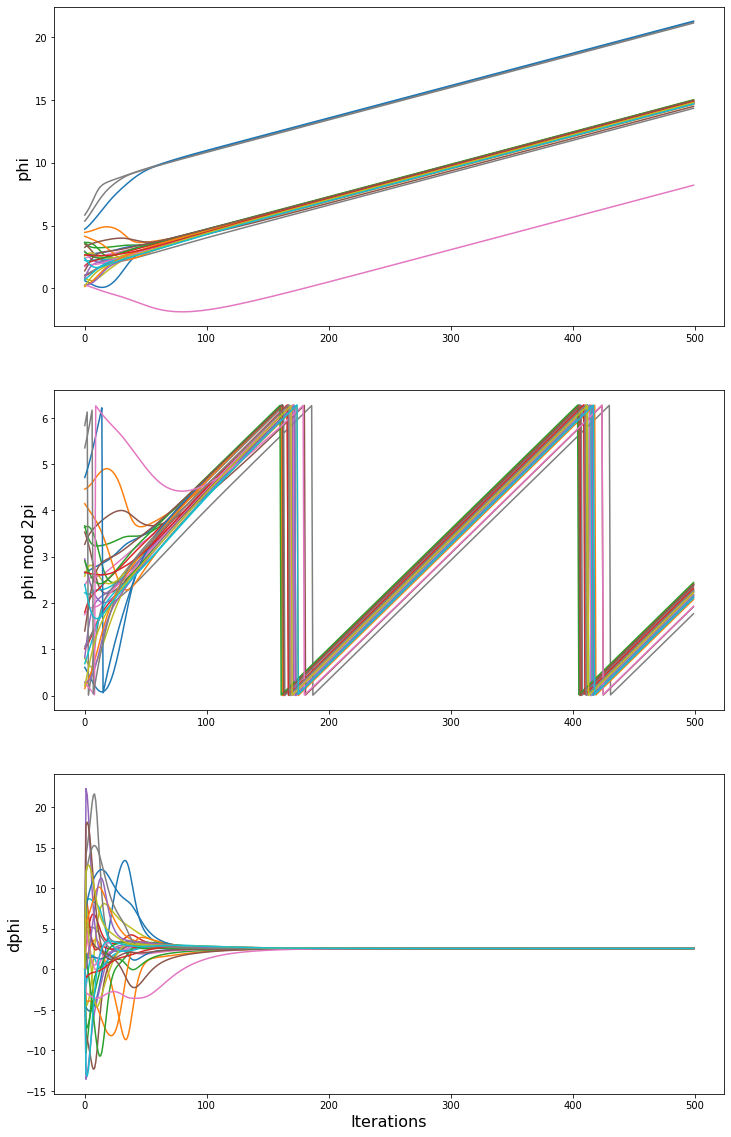

In [44]:
phi = np.zeros((N,max_iter))
dphi = np.zeros((N,max_iter))
phi[:,0] = phi0
for k in range(max_iter-1):
    ux = np.zeros((N,1))
    for i in range(N):
        for j,Aij in enumerate(A[i,:]):
            if Aij > 0:
                ux[i,0] = ux[i,0] + np.sin( phi[j,k]-phi[i,k] )
    ux = (W + K * ux).squeeze()
    phi[:,k+1] = phi[:,k] + ux * dt
    dphi[:,k+1] = ux[:]

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,20))
ax1.plot( t , phi.T )
ax2.plot( t , (phi % (np.pi*2)).T )
ax3.plot( t , dphi.T )
ax3.set_xlabel('Iterations',fontsize=16)
ax1.set_ylabel('phi',fontsize=16)
ax2.set_ylabel('phi mod 2pi',fontsize=16)
ax3.set_ylabel('dphi',fontsize=16)
plt.show()

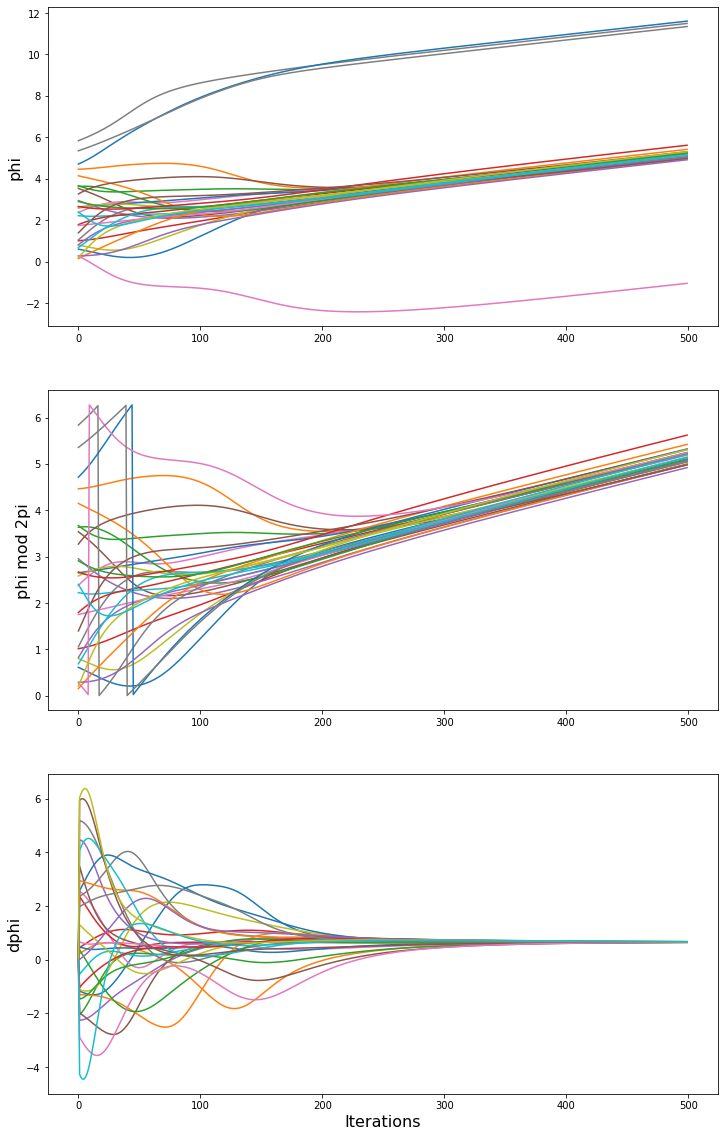

In [42]:
# Comparison: If I divide the consensus term by degree: 
phi = np.zeros((N,max_iter))
dphi = np.zeros((N,max_iter))
phi[:,0] = phi0
for k in range(max_iter-1):
    ux = np.zeros((N,1))
    for i in range(N):
        for j,Aij in enumerate(A[i,:]):
            if Aij > 0:
                ux[i,0] = ux[i,0] + np.sin( phi[j,k]-phi[i,k] )
    ux = (W + K * ux).squeeze() / deg
    phi[:,k+1] = phi[:,k] + ux * dt
    dphi[:,k+1] = ux

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,20))
ax1.plot( t , phi.T )
ax2.plot( t , (phi % (np.pi*2)).T )
ax3.plot( t , dphi.T )
ax3.set_xlabel('Iterations',fontsize=16)
ax1.set_ylabel('phi',fontsize=16)
ax2.set_ylabel('phi mod 2pi',fontsize=16)
ax3.set_ylabel('dphi',fontsize=16)
plt.show()

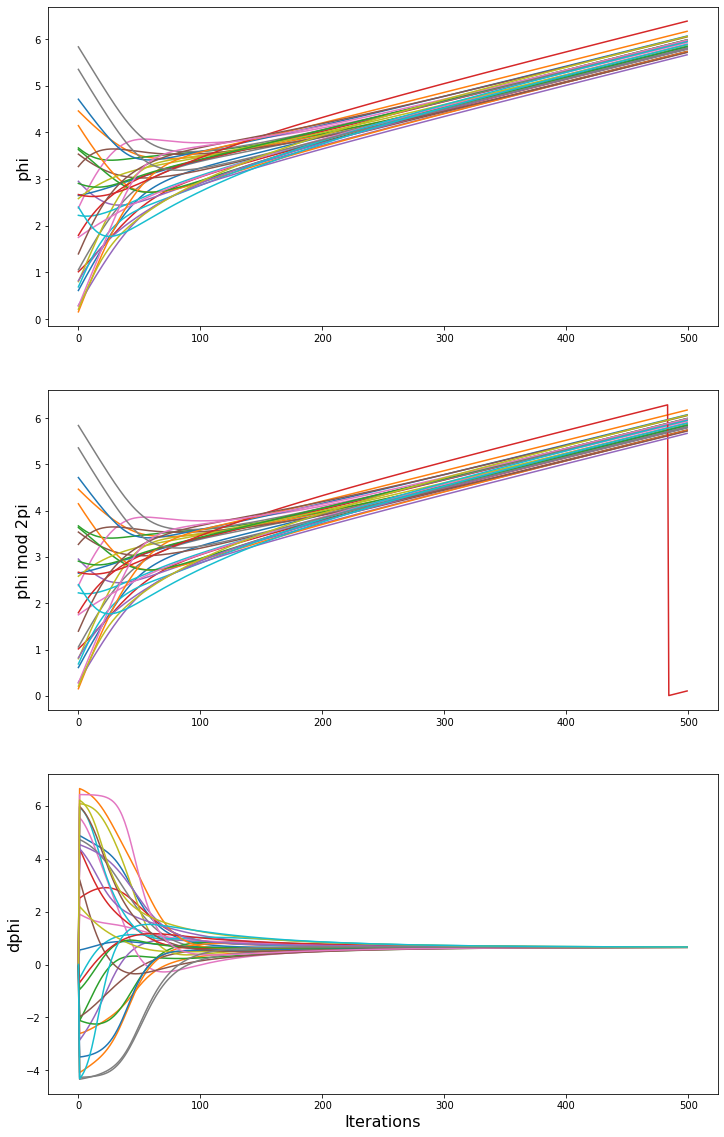

In [45]:
# Try tanh... should I keep the natural frequency? 
phi = np.zeros((N,max_iter))
dphi = np.zeros((N,max_iter))
phi[:,0] = phi0
for k in range(max_iter-1):
    ux = np.zeros((N,1))
    for i in range(N):
        for j,Aij in enumerate(A[i,:]):
            if Aij > 0:
                ux[i,0] = ux[i,0] + np.tanh( phi[j,k]-phi[i,k] )
    ux = (W + K * ux).squeeze() / deg
    phi[:,k+1] = phi[:,k] + ux * dt
    dphi[:,k+1] = ux

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,20))
ax1.plot( t , phi.T )
ax2.plot( t , (phi % (np.pi*2)).T )
ax3.plot( t , dphi.T )
ax3.set_xlabel('Iterations',fontsize=16)
ax1.set_ylabel('phi',fontsize=16)
ax2.set_ylabel('phi mod 2pi',fontsize=16)
ax3.set_ylabel('dphi',fontsize=16)
plt.show()

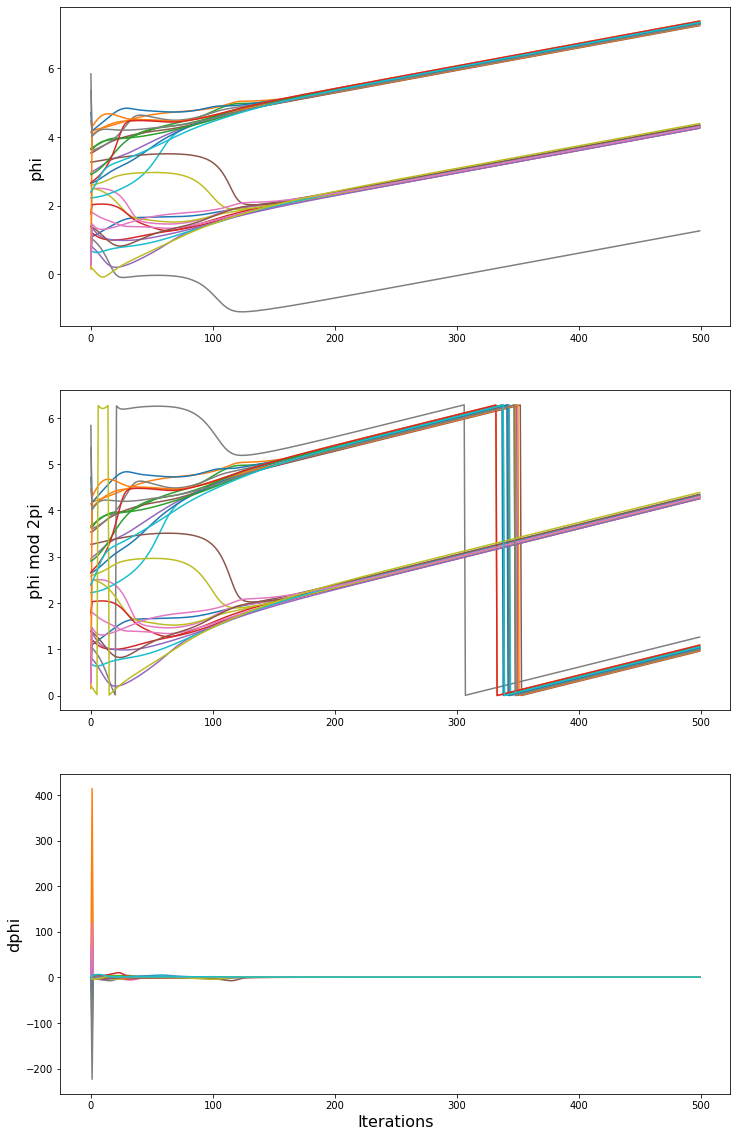

In [47]:
# Try other functions
def odd_func1(x):
    return x * (x-1) * (x+1) * (x-3) * (x+3) / 25
# Will explode if the value is too large, e.g. if you remove "/25" at the end.

phi = np.zeros((N,max_iter))
dphi = np.zeros((N,max_iter))
phi[:,0] = phi0
for k in range(max_iter-1):
    ux = np.zeros((N,1))
    for i in range(N):
        for j,Aij in enumerate(A[i,:]):
            if Aij > 0:
                ux[i,0] = ux[i,0] + odd_func1( phi[j,k]-phi[i,k] )
    ux = (W + K * ux).squeeze() / deg
    phi[:,k+1] = phi[:,k] + ux * dt
    dphi[:,k+1] = ux

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,20))
ax1.plot( t , phi.T )
ax2.plot( t , (phi % (np.pi*2)).T )
ax3.plot( t , dphi.T )
ax3.set_xlabel('Iterations',fontsize=16)
ax1.set_ylabel('phi',fontsize=16)
ax2.set_ylabel('phi mod 2pi',fontsize=16)
ax3.set_ylabel('dphi',fontsize=16)
plt.show()

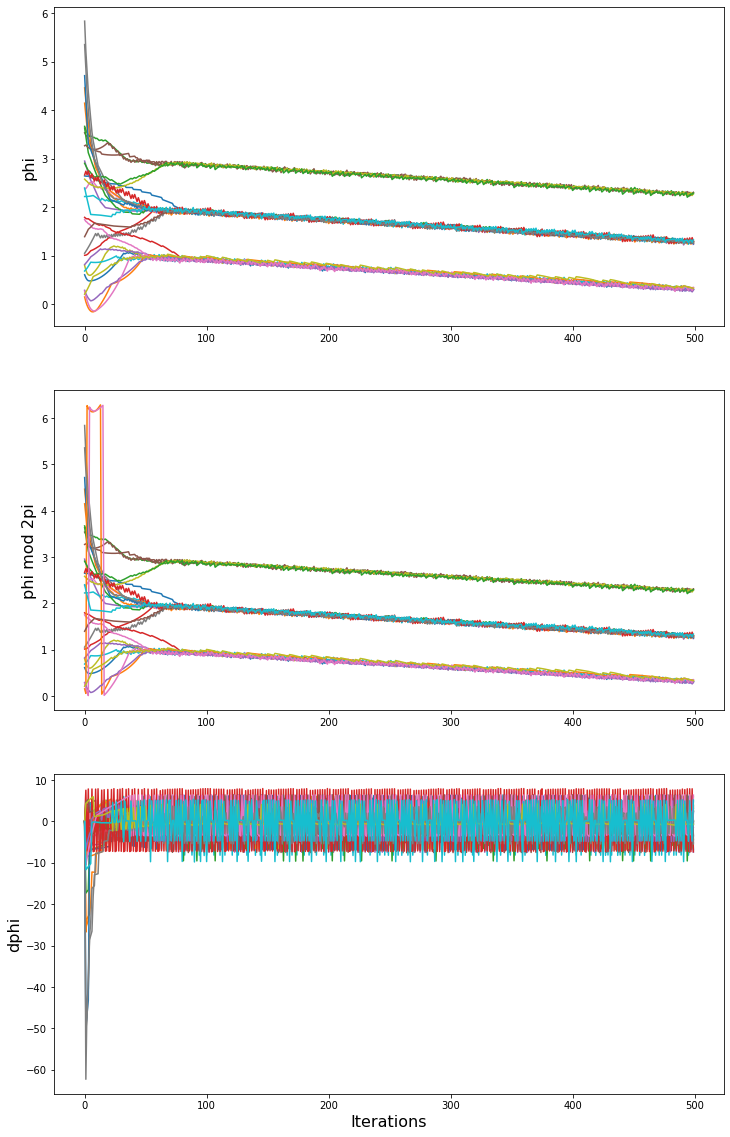

In [48]:
# Try other functions
def odd_func2(x):
    # A discontinuous one
    if x < 1 and x > -1:
        return -x
    elif x >= 1 and x < 3:
        return -0.5*x + 1.5
    elif x <= -1 and x > -3:
        return 0.5*x - 1.5
    elif x >= 3:
        return -2*x + 6
    else:
        return 2*x - 6

phi = np.zeros((N,max_iter))
dphi = np.zeros((N,max_iter))
phi[:,0] = phi0
for k in range(max_iter-1):
    ux = np.zeros((N,1))
    for i in range(N):
        for j,Aij in enumerate(A[i,:]):
            if Aij > 0:
                ux[i,0] = ux[i,0] + odd_func2( phi[j,k]-phi[i,k] )
    ux = (W + K * ux).squeeze() / deg
    phi[:,k+1] = phi[:,k] + ux * dt
    dphi[:,k+1] = ux

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,20))
ax1.plot( t , phi.T )
ax2.plot( t , (phi % (np.pi*2)).T )
ax3.plot( t , dphi.T )
ax3.set_xlabel('Iterations',fontsize=16)
ax1.set_ylabel('phi',fontsize=16)
ax2.set_ylabel('phi mod 2pi',fontsize=16)
ax3.set_ylabel('dphi',fontsize=16)
plt.show()

In [ ]:
### Try directed graph


In [ ]:
# Plot the modulus only
fig = plt.figure(figsize=(12,7))
plt.plot( t , (phi % (np.pi*2)).T )
plt.xlabel('Iterations',fontsize=16)
plt.ylabel('| x | mod 2pi',fontsize=16)
plt.show()

In [ ]:
ax = plt.subplot()
ax.plot( t , phi.T, figsize=(12,7) )
ax.set_xlabel('Iterations',fontsize=16)
ax.set_ylabel('| x |',fontsize=16)
plt.show()

In [32]:
ux.squeeze()/deg

array([-2.19262224e-03, -1.27938537e-02,  5.68884565e-02, -3.69092118e-02,
        6.90188370e-02,  1.21469971e-01,  7.44313222e-02,  4.79978031e-01,
       -9.51458169e-02,  1.47187783e-02, -9.08908393e-02,  1.71402572e-01,
       -9.38462083e-02, -2.08019019e-02,  9.76127419e-03,  2.21722578e-01,
        3.49310718e-04, -5.65729721e-02, -6.16842502e-02,  3.63624683e-02,
       -1.18428169e-01, -1.12500500e-01, -9.52538222e-02, -7.23780531e-02,
        1.23606075e-01, -1.18989391e-01,  2.29674502e-01,  4.71766755e-03,
       -4.18962020e-02,  9.17396868e-02])